In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sudoku User File

In [2]:
sudoku = pd.read_csv("Sudoku_user.csv")

In [3]:
sudoku.shape

(264690, 6)

In [4]:
sudoku.head()

,User ID,Birth Year,Country,Country.1,US State,Gender
0,1,1976,il,Israel,NaN,m
1,2,1950,il,Israel,NaN,f
2,3,0,NaN,NaN,TX,NaN
3,4,0,NaN,NaN,NaN,NaN
4,5,1949,us,United States,FL,m


In [5]:
## Find all null values

null_birth = sudoku[sudoku["Birth Year"] == 0]

In [6]:
null_birth.shape

(90231, 6)

In [7]:
null_country = sudoku[sudoku['Country'].isnull() == True]

In [8]:
null_country.shape

(91351, 6)

In [9]:
null_gender = sudoku[sudoku['Gender'].isnull() == True]

In [10]:
null_gender.shape

(93569, 6)

In [32]:
null_all = sudoku[(sudoku['Gender'].isnull())& (sudoku['Country'].isnull() & (sudoku["Birth Year"] == 0))]

In [12]:
null_all.shape

(70360, 6)

## Approx. 1/3 of the sudoku players don't populate the demographic information 

In [119]:
sudoku = sudoku.drop(null_all.index)

KeyError: '[     2      3      5 ... 264654 264671 264689] not found in axis'

In [58]:
sudoku.Gender.unique()

array(['m', 'f', nan, '?', '1'], dtype=object)

In [59]:
sudoku.head()

,User ID,Birth Year,Country,Country.1,US State,Gender
0,1,1976,il,Israel,NaN,m
1,2,1950,il,Israel,NaN,f
4,5,1949,us,United States,FL,m
6,7,1958,us,United States,WA,f
7,8,1963,in,India,NaN,m


In [63]:
## Relationship between country and gender
### Drop all the entries with values that don't make sense

sudoku.drop(sudoku[sudoku["Country"].isnull()].index)

,User ID,Birth Year,Country,Country.1,US State,Gender
0,1,1976,il,Israel,NaN,m
1,2,1950,il,Israel,NaN,f
4,5,1949,us,United States,FL,m
6,7,1958,us,United States,WA,f
7,8,1963,in,India,NaN,m
8,9,1987,in,India,NaN,f
9,10,1989,in,India,NaN,f
10,11,1943,us,United States,TX,m
11,12,1989,NaN,NaN,NaN,m
12,13,1974,us,United States,VA,m


In [67]:
sudoku1 = sudoku.drop(sudoku[sudoku["Gender"].isnull()].index)

In [68]:
## Relationship between country and gender

sudoku1_distribution = sudoku1.groupby(["Country.1","Gender"]).count().reset_index()

In [69]:
sudoku1_dist_male = sudoku1_distribution[sudoku1_distribution.Gender == "m"]

In [70]:
sudoku1_dist_male = sudoku1_dist_male.sort_values("Country",ascending = False)

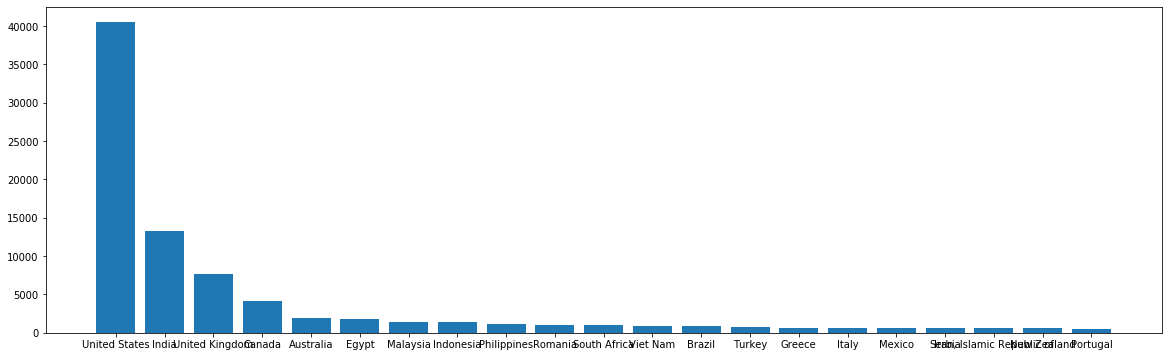

In [71]:
plt.figure(figsize = (20, 6))

plt.bar("Country.1","Country", data = sudoku1_dist_male[0:21])

plt.show()

In [72]:
sudoku1_dist_female = sudoku1_distribution[sudoku1_distribution.Gender == "f"]

In [73]:
sudoku1_dist_female = sudoku1_dist_female.sort_values("Country",ascending = False)

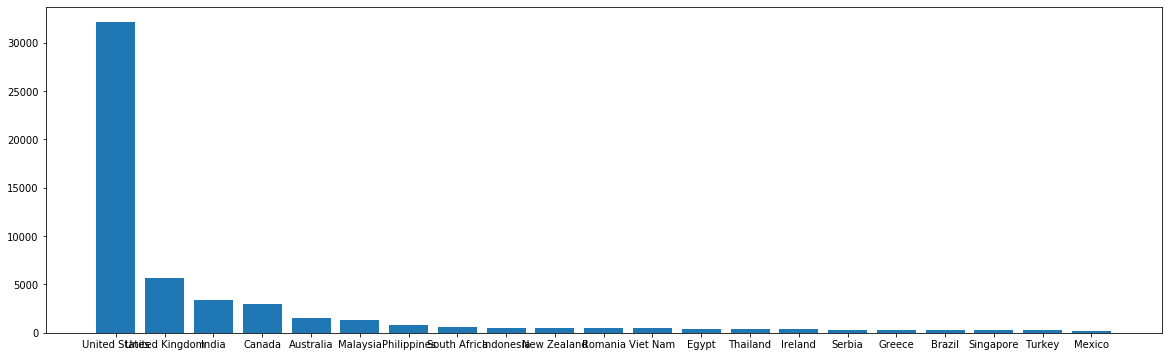

In [74]:
plt.figure(figsize = (20, 6))

plt.bar("Country.1","Country", data = sudoku1_dist_female[0:21])

plt.show()

## There are signficantly more Indian players (male > female)

In [23]:
## Is there relationship between birth year, gender country?

print(sudoku1["Birth Year"].min())
print(sudoku1["Birth Year"].max())

0
2017


In [75]:
## Drop birth year value that doesn't make sense

sudoku2 = sudoku1.drop(sudoku1[sudoku1["Birth Year"] == 0].index)

In [110]:
sudoku2["Birth Year"].sort_values().unique()

array([1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900,
       1901, 1902, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017])

In [83]:
sudoku2.shape

(162806, 6)

In [99]:
## Split birth year into buckets: <1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010+
sudoku2_1940 = sudoku2[sudoku2["Birth Year"]< 1940]
sudoku2_1940.count()

User ID           6371
Birth Year        6371
Country           5798
Country.1         5798
US State          3310
Gender            6371
Birth_year_bin    6371
dtype: int64

In [111]:
## Create a dataframe 

sudoku2_1940.groupby(["Gender"]).count().reset_index()

,Gender,User ID,Birth Year,Country,Country.1,US State,Birth_year_bin
0,f,1810,1810,1595,1595,999,1810
1,m,4561,4561,4203,4203,2311,4561


## Sudoku Counts File

In [231]:
counts = pd.read_csv("Sudoku_counts.csv")
counts.shape

(311919, 8)

In [138]:
sudoku = pd.read_csv("Sudoku_user.csv")

In [113]:
counts.head()

,User ID,Puzzle Level,Best Time (s),Puzzles Solved,Puzzle Solved w/o Errors,Puzzle Solved w/ Errors,Total Time (s) for all Puzzles Solved,Total of (time squared) for all puzzles solved
0,1,1,506,1,1,0,506,256036
1,2,1,79,12,11,1,2307,511683
2,2,2,65,2,1,1,131,8581
3,2,4,294,2,2,0,1556,1679080
4,3,1,190,1,1,0,190,36100


In [213]:
print(counts["Best Time (s)"].min())
print(counts["Best Time (s)"].max())

0
7196


In [214]:
counts[counts["Best Time (s)"]==0].count()

User ID                                           969
Puzzle Level                                      969
Best Time (s)                                     969
Puzzles Solved                                    969
Puzzle Solved w/o Errors                          969
Puzzle Solved w/ Errors                           969
Total Time (s) for all Puzzles Solved             969
Total of (time squared) for all puzzles solved    969
dtype: int64

## There are 969 entries where the best time (s) is 0. 

In [230]:
data = counts[counts["Best Time (s)"]==0]
pd.Series(data['User ID'].unique())

0         119
1         168
2         539
3         571
4         967
5         970
6        1266
7        1284
8        1337
9        1405
10       1441
11       1717
12       1994
13       2175
14       2304
15       2375
16       2547
17       2940
18       2995
19       3228
20       3256
21       3688
22       3762
23       3862
24       4285
25       4384
26       4458
27       4481
28       4553
29       4564
        ...  
918    247271
919    247701
920    248148
921    248497
922    249075
923    249756
924    249758
925    249900
926    250665
927    251780
928    252105
929    252168
930    252670
931    253140
932    253276
933    253424
934    253507
935    255083
936    255579
937    255850
938    256950
939    257594
940    257612
941    257803
942    259384
943    259466
944    260726
945    261669
946    263543
947    264281
Length: 948, dtype: int64

In [225]:
## extract puzzle level 1

counts_easy = counts[counts["Puzzle Level"] ==1].reset_index()
counts_easy.head()

,index,User ID,Puzzle Level,Best Time (s),Puzzles Solved,Puzzle Solved w/o Errors,Puzzle Solved w/ Errors,Total Time (s) for all Puzzles Solved,Total of (time squared) for all puzzles solved
0,0,1,1,506,1,1,0,506,256036
1,1,2,1,79,12,11,1,2307,511683
2,4,3,1,190,1,1,0,190,36100
3,7,5,1,257,119,35,21,72691,53643653
4,13,8,1,156,850,785,65,253451,115729295


In [207]:
counts_easy.sort_values(["Best Time (s)", "Puzzles Solved"],ascending = [True, False])
easy_top20 = counts_easy.sort_values(["Best Time (s)", "Puzzles Solved"],ascending = [True, False])[0:21]
easy_top20

,index,User ID,Puzzle Level,Best Time (s),Puzzles Solved,Puzzle Solved w/o Errors,Puzzle Solved w/ Errors,Total Time (s) for all Puzzles Solved,Total of (time squared) for all puzzles solved
6055,15505,9313,1,0,256,29,227,132799,94593867
361,934,539,1,0,240,185,55,86844,34948402
21144,49131,31765,1,0,157,143,14,73937,37937711
26211,59930,39529,1,0,148,143,5,41989,12884967
27470,62614,41457,1,0,134,113,21,60122,31300172
1893,5123,2940,1,0,132,92,40,34259,9299037
7346,18495,11205,1,0,122,116,6,38617,13315831
6511,16556,9995,1,0,112,99,13,22835,4951413
13809,33072,20631,1,0,86,84,2,40810,21136034
34367,77633,52077,1,0,53,49,4,32804,24933696


In [205]:
x = []
for i in easy_top20["User ID"]:
    x.append(sudoku[sudoku["User ID"] == i]["Country.1"])
x

[9312    United States
 Name: Country.1, dtype: object, 538    Spain
 Name: Country.1, dtype: object, 31764    NaN
 Name: Country.1, dtype: object, 39528    Philippines
 Name: Country.1, dtype: object, 41456    India
 Name: Country.1, dtype: object, 2939    Canada
 Name: Country.1, dtype: object, 11204    United States
 Name: Country.1, dtype: object, 9994    Canada
 Name: Country.1, dtype: object, 20630    NaN
 Name: Country.1, dtype: object, 52076    Malaysia
 Name: Country.1, dtype: object, 12322    Italy
 Name: Country.1, dtype: object, 32740    India
 Name: Country.1, dtype: object, 18171    NaN
 Name: Country.1, dtype: object, 44630    Greece
 Name: Country.1, dtype: object, 10472    NaN
 Name: Country.1, dtype: object, 36183    Philippines
 Name: Country.1, dtype: object, 10617    Viet Nam
 Name: Country.1, dtype: object, 32050    Egypt
 Name: Country.1, dtype: object, 7687    NaN
 Name: Country.1, dtype: object, 52525    Malaysia
 Name: Country.1, dtype: object, 20615    India


In [212]:
counts_easy[counts_easy["Best Time (s)"] == 0].count()

index                                             590
User ID                                           590
Puzzle Level                                      590
Best Time (s)                                     590
Puzzles Solved                                    590
Puzzle Solved w/o Errors                          590
Puzzle Solved w/ Errors                           590
Total Time (s) for all Puzzles Solved             590
Total of (time squared) for all puzzles solved    590
dtype: int64